In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [2]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston.keys()
# Boston data set is divided into 4 parts which are called keys
# 1. data - Contains the actual data
# 2. features_names - Contains the column names
# 3. target - Contains the column which will be used for prediction
# 4. Descr - Documentation about the dataset like Instances, attributes, missing attribute(if any), library from which the data is being taken

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos['Price'] = boston.target #Adding target values to the data as Price column
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bos.describe() #The summary statistics of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


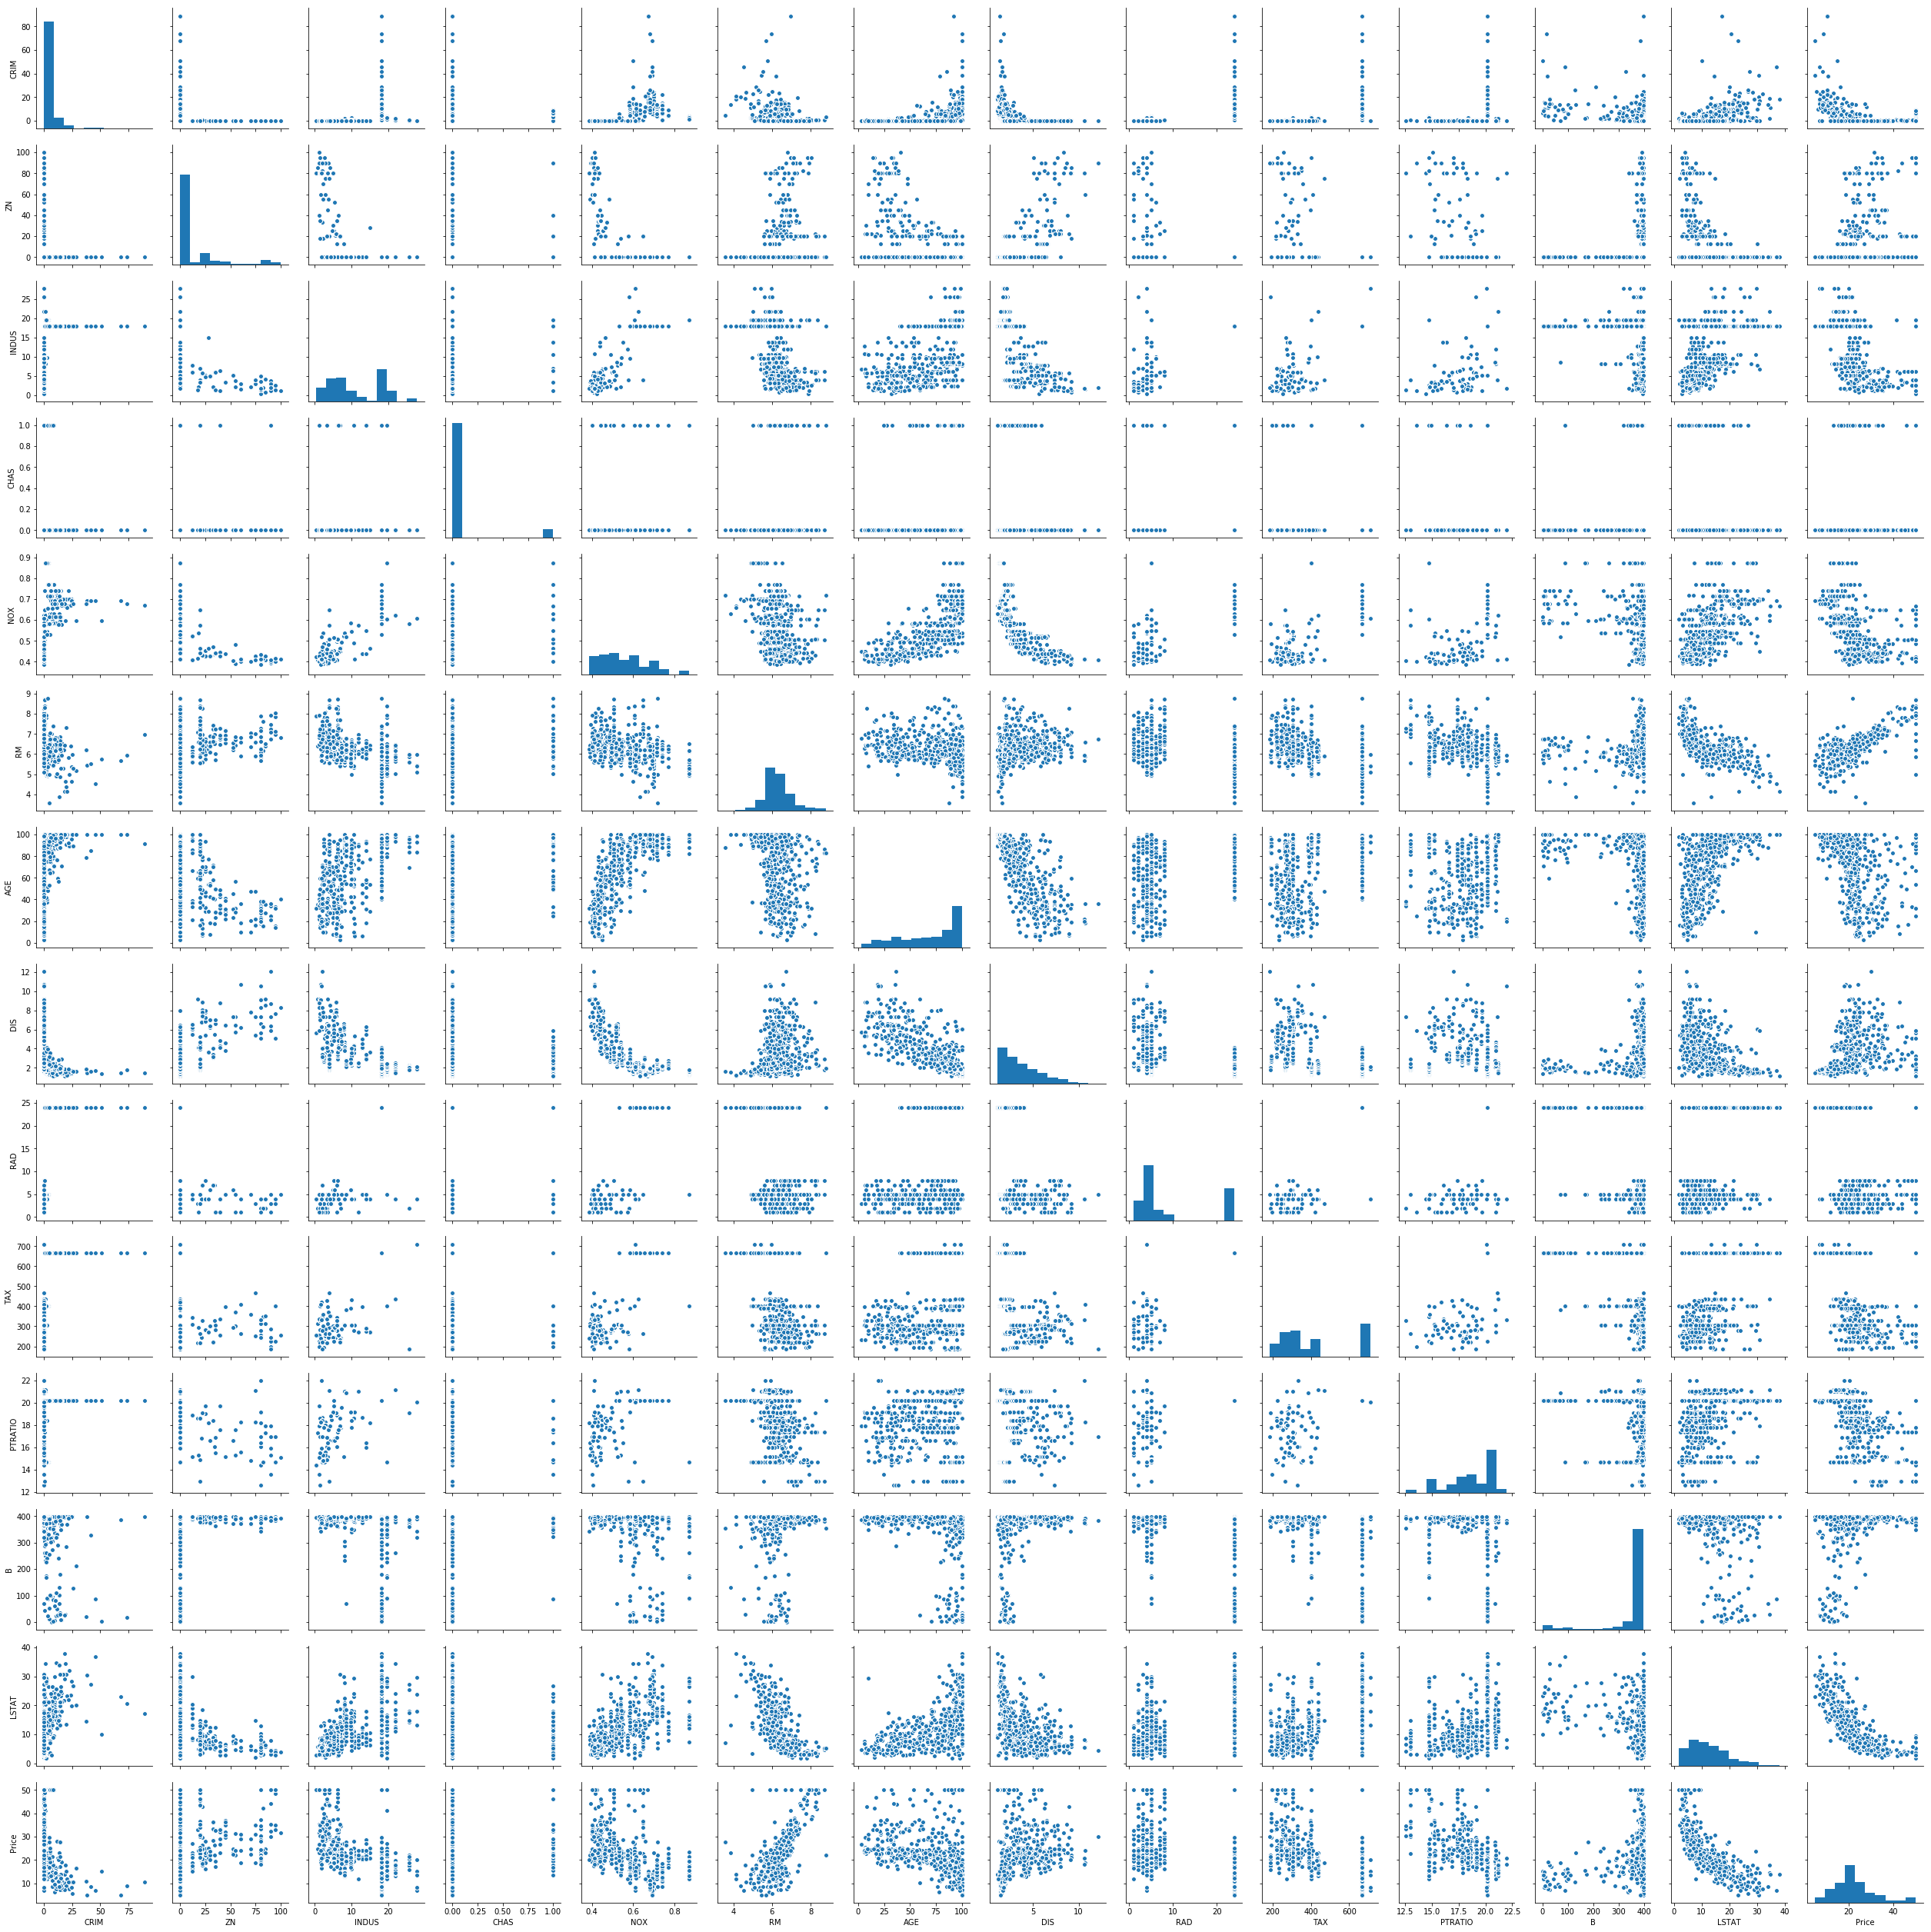

In [10]:
import seaborn as sns

sns.pairplot(bos) #Plots pairwise relationships in a dataset.

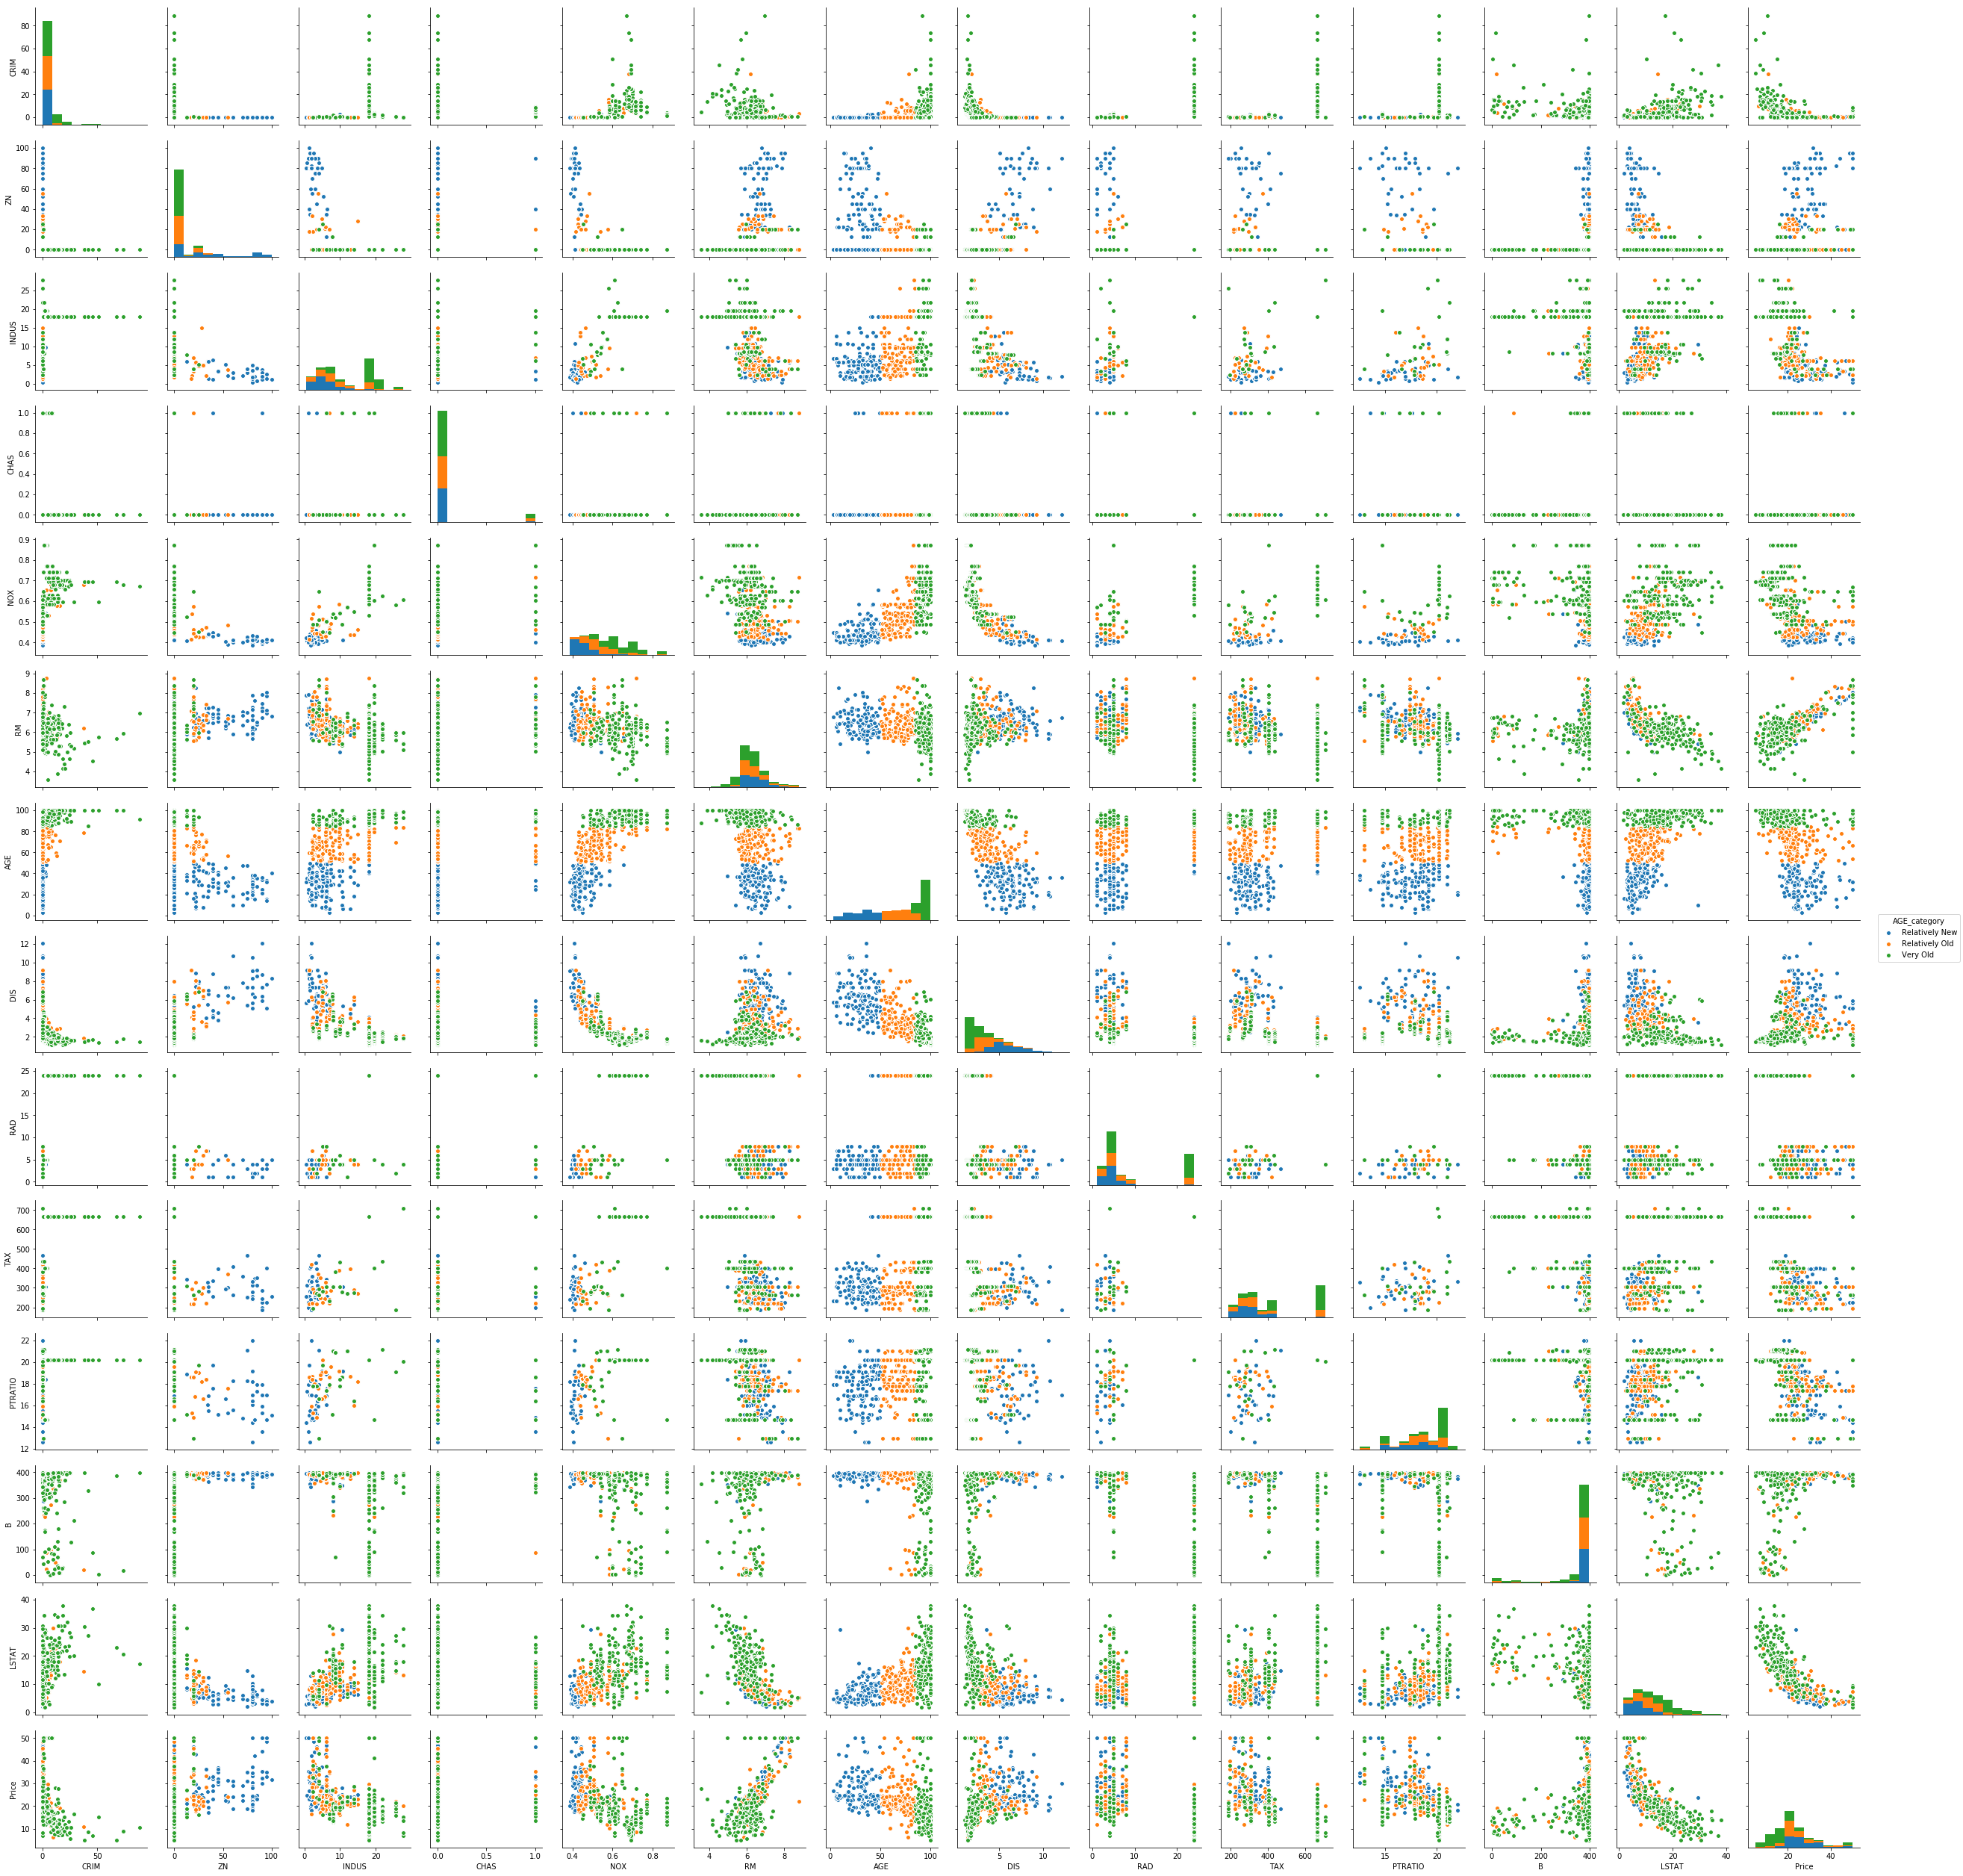

In [11]:
    def get_age_category(x):
        if x < 50:
            return 'Relatively New'
        elif 50 <= x < 85:
            return 'Relatively Old'
        else:
            return 'Very Old'
    bos['AGE_category'] = bos.AGE.apply(get_age_category)

sns.pairplot(bos, hue='AGE_category',hue_order=['Relatively New', 'Relatively Old', 'Very Old']); 

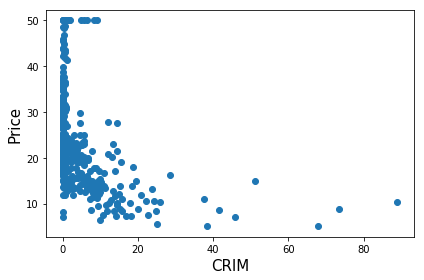

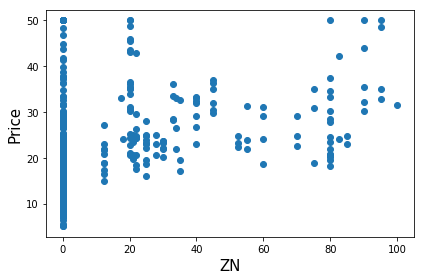

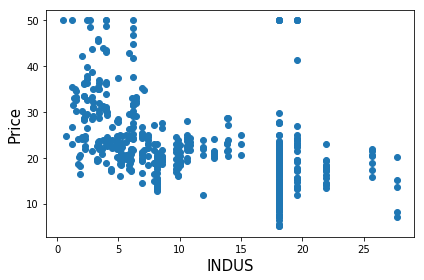

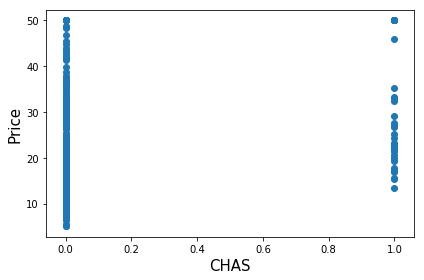

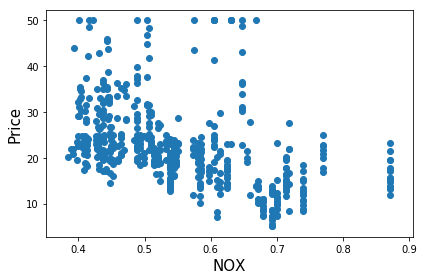

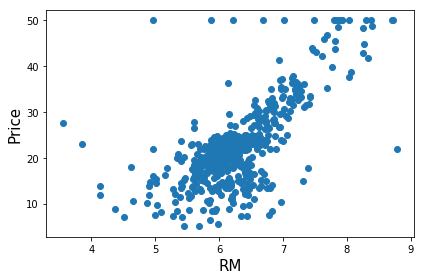

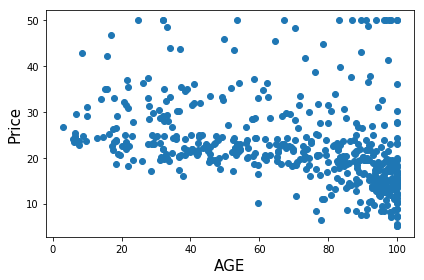

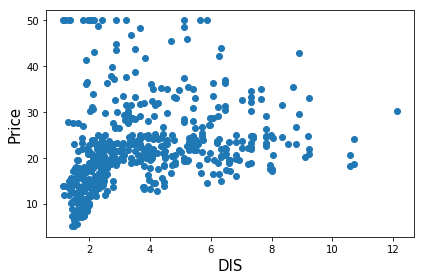

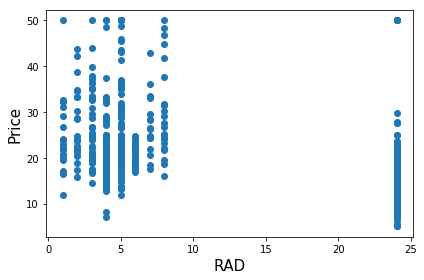

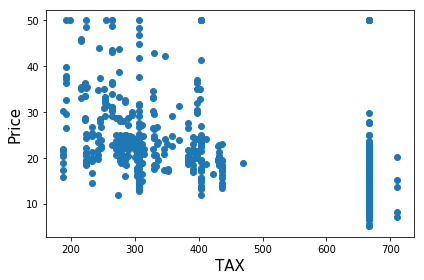

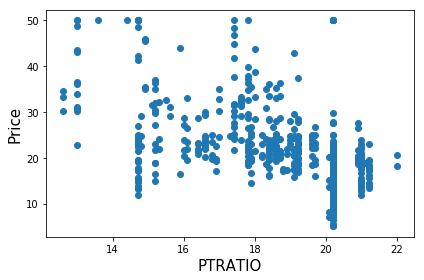

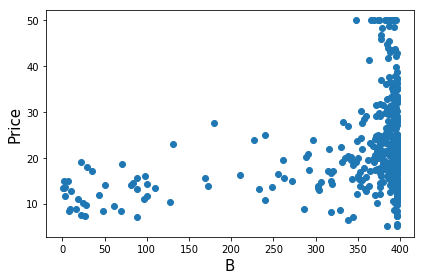

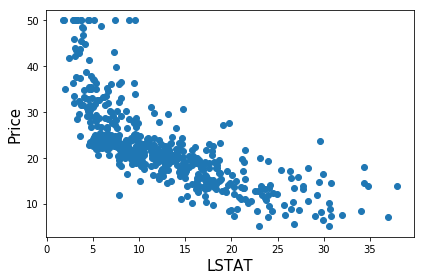

In [12]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(6, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


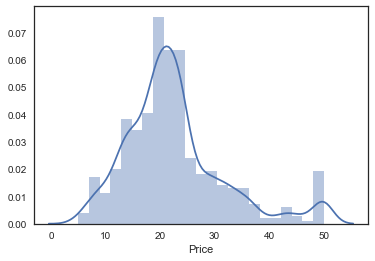

In [15]:
sns.distplot(bos['Price']) #Flexibly plot a univariate distribution of observations.`a

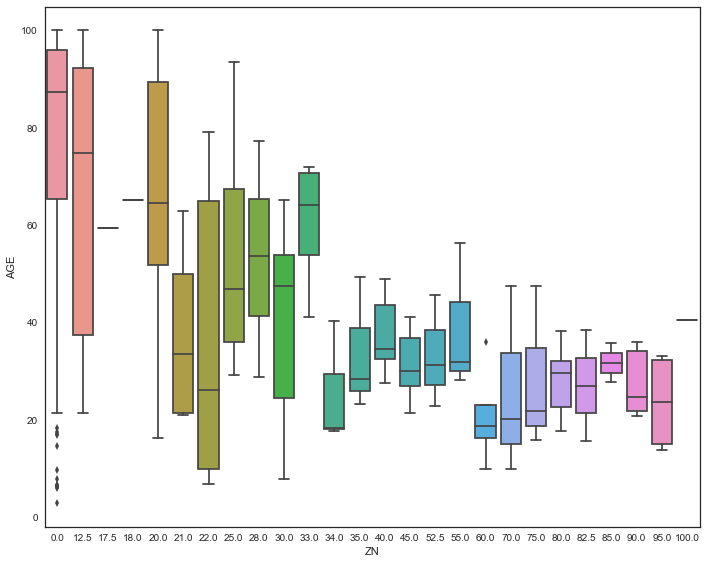

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='ZN', y='AGE', data=bos)
plt.tight_layout()

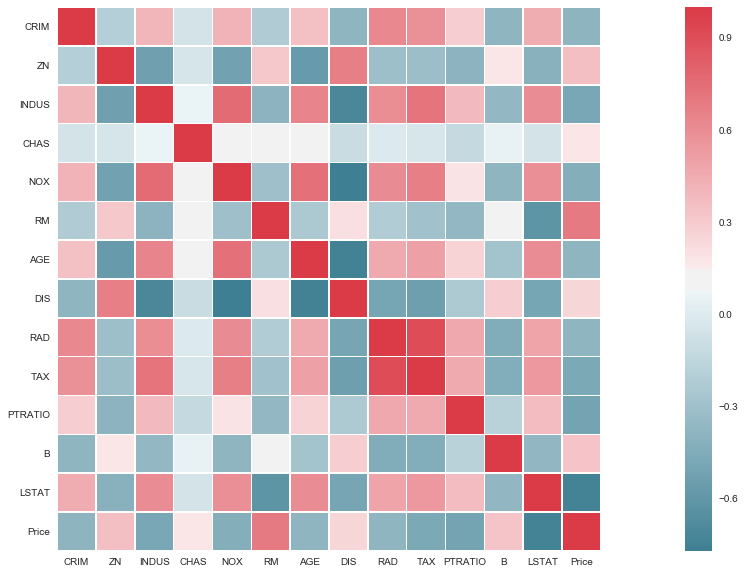

In [22]:
sns.set(style="white")
df_corr= bos[:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask

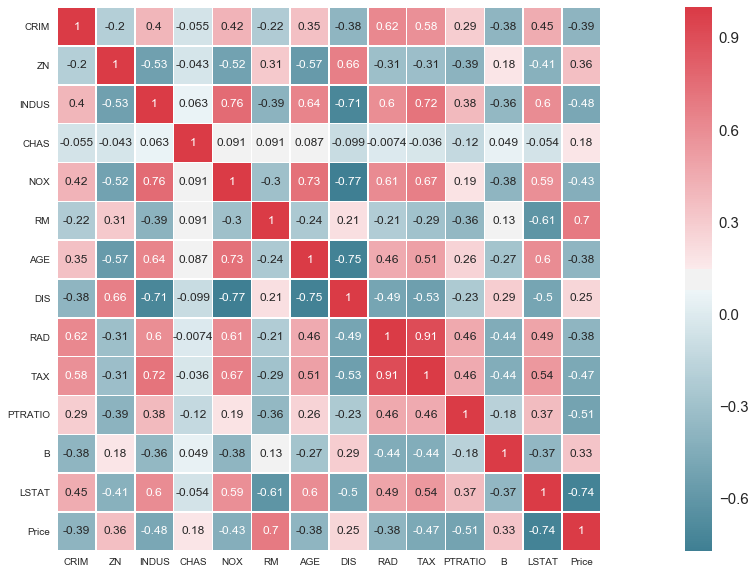

In [23]:

sns.set(style="white")
df_corr= bos[:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.set(font_scale=1.5)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax,cbar=True,annot=True,annot_kws={'size':12}) #Draw the heatmap with the mask


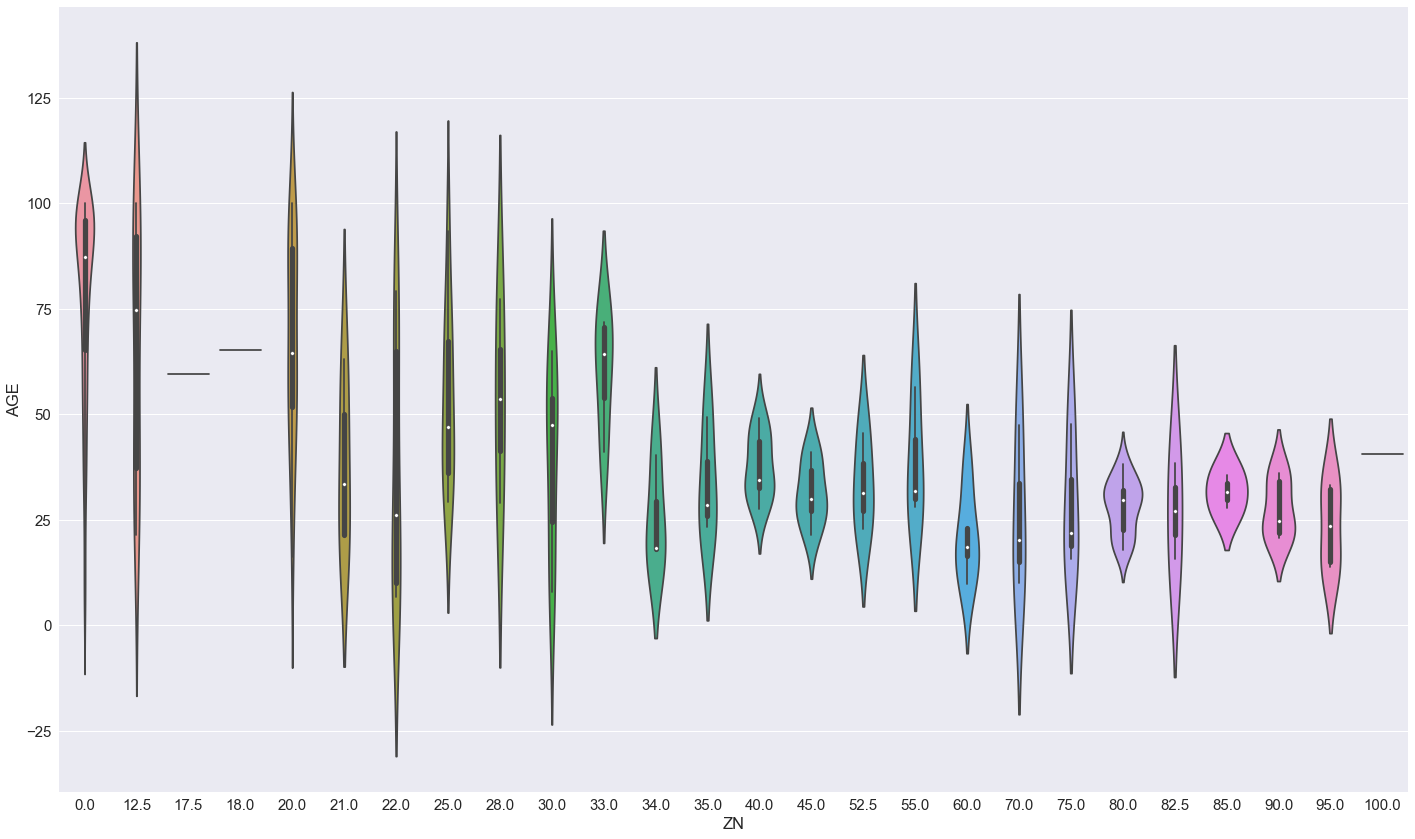

In [24]:
plt.figure(figsize=(20, 12))
sns.violinplot(x='ZN', y='AGE', data=bos)
plt.tight_layout()

In [25]:
bos.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [26]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,AGE_category
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Relatively Old
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Relatively Old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Relatively Old
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Relatively New
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Relatively Old


In [27]:
#Spliting the dataset into two: target value and predictor values. 
del bos['AGE_category']
X = bos.drop('Price', axis = 1) #All features except Price ( predictor values )
Y = bos['Price'] #Boston housing price ( target value )

In [28]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
Y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [30]:
# Splitting data into Train and Test datasets - 75 : 25 ratio
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [31]:
print(X_train['CRIM'].count())
print(X_test['CRIM'].count())
print(Y_train.count())
print(Y_test.count())

379
127
379
127


In [32]:
# Creating the Model
from sklearn.linear_model import LinearRegression #Imports LinearRegression
lm = LinearRegression() #Creating an instance of LinearRegression

In [33]:
# Training the Model
lm.fit(X_train, Y_train) #Fitting the created instance of the LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#Printing intercept 
print(lm.intercept_)

32.2771010775718


In [35]:
#Printing coefficients
print(lm.coef_)

[-1.52213959e-01  4.79017456e-02 -8.08879927e-03  2.58311045e+00
 -1.46998773e+01  3.95400206e+00 -7.83430200e-03 -1.46170516e+00
  3.45217571e-01 -1.24415767e-02 -9.20351915e-01  1.33625399e-02
 -5.18393389e-01]


In [36]:
# Predicting using Test data
Y_pred = lm.predict(X_test)

In [37]:
Y_pred

array([37.65401207, 32.10372365, 27.01152205,  6.20601449, 35.48259622,
        5.3666632 , 27.45140473, 31.59285402, 26.47156981, 22.91238788,
       32.21108321, 21.53383012, 23.41512069, 33.69179561, 28.41893649,
       14.58998891, -0.28853234, 18.20825419, 14.08608167, 11.68746314,
        2.67973483, 19.68608992, 38.53696106, 24.25820785, 31.78785704,
       11.21262434, 24.95000144, 23.32491032, 22.50276684, 20.69413758,
       15.60727726,  7.35088715, 18.07641087, 23.01576914, 29.12430631,
       19.05433482, 30.00775309,  8.37648213, 41.33945265, 34.62152692,
       20.61888512,  3.53525605, 29.72413092, 11.80082908, 26.99351497,
       30.80712628, -6.94126373, 19.8365538 , 20.99722308, 13.29942116,
       20.58985153, 19.51686311, 23.70608531, 12.91381096, 16.91491828,
       25.02843005, 35.32019721, 15.17805048, 28.28269536, 21.23821954,
       20.53079033, 25.75294699, 14.79278481, 32.64444837, 22.93693792,
       12.54036409, 19.39763607, 24.83312716, 21.62926038, 21.80

In [38]:
#Confidence in our Model
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=bos).fit()
lm.conf_int() #Confidence Intervals of Model

,0,1
Intercept,26.461795,46.520411
CRIM,-0.171443,-0.042898
ZN,0.019422,0.073368
INDUS,-0.099968,0.141689
CHAS,0.995659,4.381463
NOX,-25.302434,-10.289083
RM,2.983470,4.626035
AGE,-0.025205,0.026707
DIS,-1.867703,-1.083814
RAD,0.175323,0.435987


In [39]:
lm.summary() #Model Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          6.95e-135
Time:                        23:28:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
lm.pvalues #Prints the p-values

Intercept    3.182440e-12
CRIM         1.126402e-03
ZN           7.836070e-04
INDUS        7.345971e-01
CHAS         1.912339e-03
NOX          4.117296e-06
RM           2.207486e-18
AGE          9.546859e-01
DIS          6.017651e-13
RAD          5.189664e-06
TAX          1.117826e-03
PTRATIO      1.268218e-12
B            5.072875e-04
LSTAT        6.595808e-23
dtype: float64

In [41]:
lm.rsquared #Prints the R-squared value for the model

0.7406077428649427

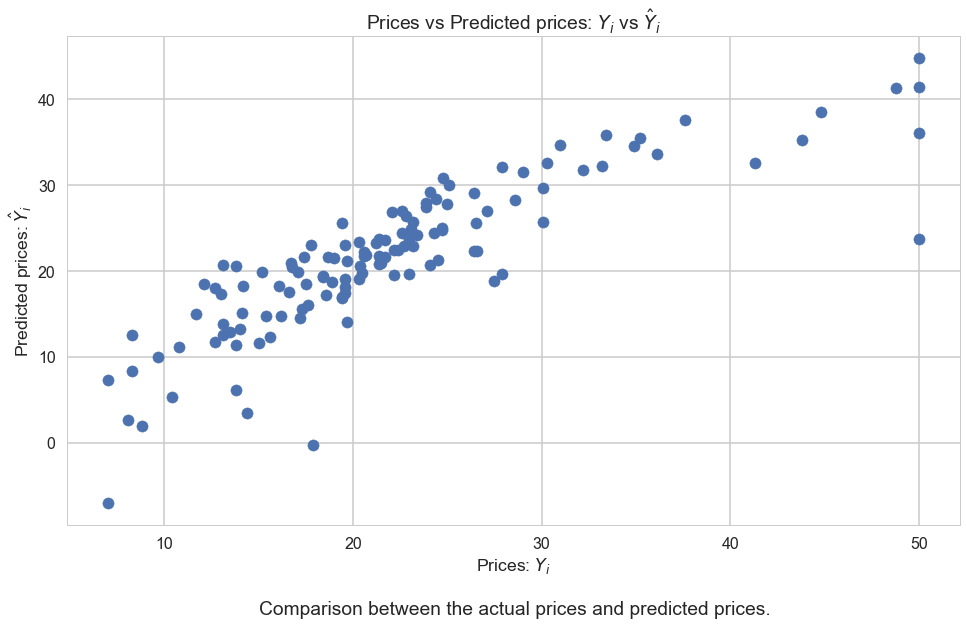

In [42]:
#To visualize the differences between actual prices and predicted values, creating a scatter plot.
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.text(15,-20, "Comparison between the actual prices and predicted prices.", ha='left')
plt.show()

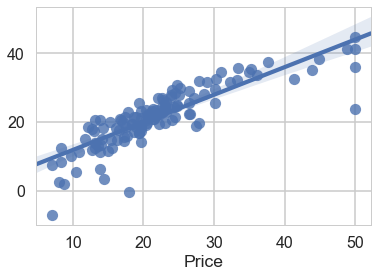

In [43]:
sns.regplot(Y_test, Y_pred, data=bos, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

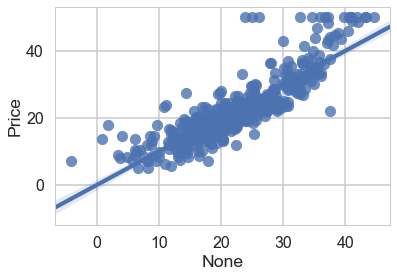

In [44]:
sns.regplot(x=lm.predict(X), y=bos['Price'], data=bos, fit_reg=True)

In [45]:
#Calculating Mean Squared Error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred) #Mean Squared Error: To check the level of error of a model
print(mse)

24.29810576843942


In [46]:
#Calculating Root Mean Squared Error
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)

4.92931088169933


In [47]:
print("The Root Mean Square Error (RMSE) for the Model is 4.929310881699323 and the Results can be further improved.")

The Root Mean Square Error (RMSE) for the Model is 4.929310881699323 and the Results can be further improved.
